In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import healpy as hp
from scipy.interpolate import interp1d
from scipy.stats import pearsonr

nside = 1024
lmax = 1024*3-1

In [3]:
s_e_mode = np.load('test_wiener2_E_180320.npy')

In [4]:
s_e_mode

array([5.49878763e-06, 3.16837420e-06, 4.30307226e-06, ...,
       7.80699117e-05, 6.69773183e-05, 7.17677057e-05])

In [5]:
alm = hp.map2alm(s_e_mode, lmax=1024*3-1)

In [6]:
ell, emm = hp.Alm.getlm(lmax=1024*3-1)
prefactor = ((ell*(ell+1.))/((ell+2.)*(ell-1)))**0.5
prefactor[prefactor == np.inf] =0
almsE = alm*prefactor

/Users/ucapnje/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [7]:
kappa = hp.alm2map(almsE, nside=1024, lmax = 3*1024-1)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


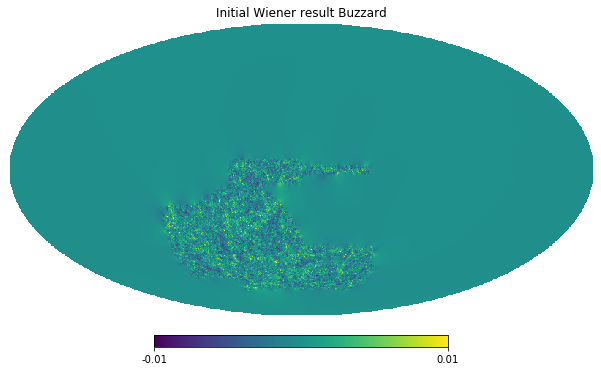

In [8]:
hp.mollview(kappa, min = -0.01,max=0.01, title='Initial Wiener result Buzzard')

In [27]:
hp.write_map('wiener2_kappa_180320.fits', kappa, overwrite=True)

In [10]:
old_kappa = hp.read_map('wiener_150120')

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [11]:
des_buzzard = fits.open('../../dante/des/KS_1024.fits')

In [12]:
kappa_buzzard = des_buzzard[1].data['k_orig']
mask = np.where(des_buzzard[1].data['N_source']>0.5, 1., 0.)
# mask = np.where(kappa!=0., 1., 0.)

In [13]:
pearsonr(old_kappa*mask, kappa_buzzard*mask)

(0.42681963475682017, 0.0)

In [14]:
pearsonr(kappa*mask, kappa_buzzard*mask)

(0.4339732522982089, 0.0)

In [15]:
kappa_buzzard_smoothed = hp.smoothing(kappa_buzzard, sigma=np.deg2rad(0.1))
kappa_buzzard_smoothed = mask*kappa_buzzard_smoothed

Sigma is 6.000000 arcmin (0.001745 rad) 
-> fwhm is 14.128920 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


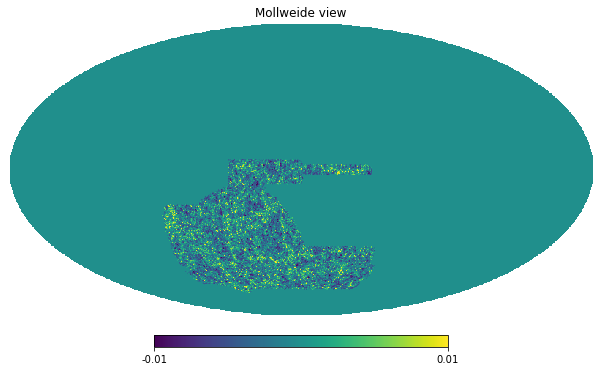

In [16]:
hp.mollview(kappa_buzzard_smoothed, min=-0.01,max=0.01)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


/Users/ucapnje/anaconda3/lib/python3.6/site-packages/healpy/projector.py:846: RuntimeWarning: invalid value encountered in greater
  mask = np.asarray(x) ** 2 + np.asarray(y) ** 2 > 1.0
/Users/ucapnje/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:423: RuntimeWarning: invalid value encountered in greater
  w = np.where(d2 > threshold)[0]


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


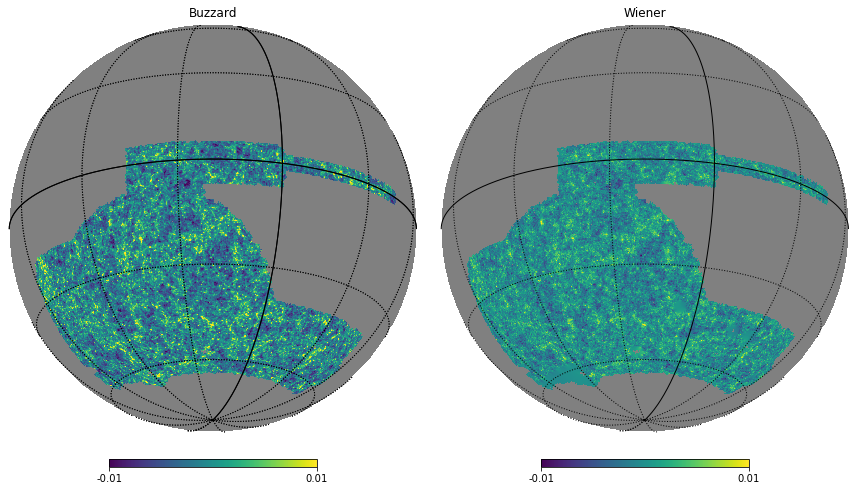

In [17]:
_ = plt.figure(figsize=(12,7))
_ = hp.orthview(np.where(mask>0,kappa_buzzard_smoothed, hp.UNSEEN),
            min=-0.01,max=0.01, rot=(20,-20,0) , half_sky=True, sub=(1,2,1),
               title='Buzzard'), hp.graticule()

_ = hp.orthview(np.where(mask>0,kappa, hp.UNSEEN),
            min=-0.01,max=0.01, rot=(20,-20,0) , half_sky=True, sub=(1,2,2),
               title='Wiener'), hp.graticule() ;

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


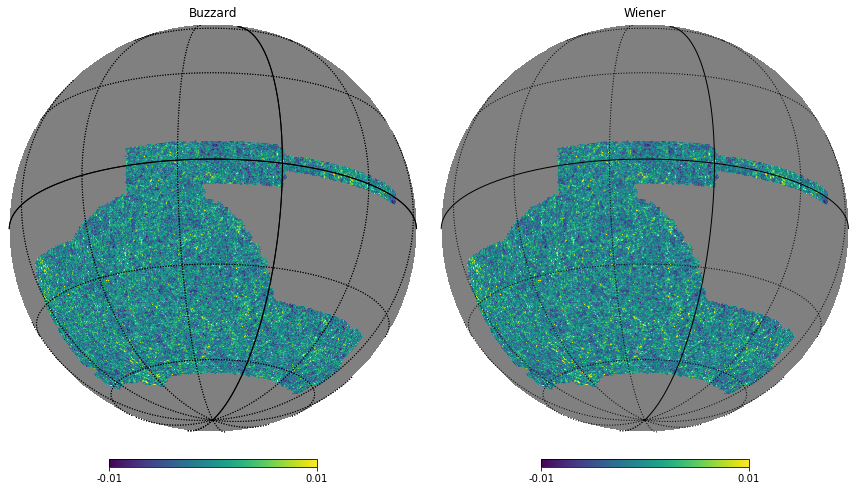

In [18]:
_ = plt.figure(figsize=(12,7))
_ = hp.orthview(np.where(mask>0,kappa_buzzard_smoothed - kappa, hp.UNSEEN),
            min=-0.01,max=0.01, rot=(20,-20,0) , half_sky=True, sub=(1,2,1),
               title='Buzzard'), hp.graticule()

_ = hp.orthview(np.where(mask>0,kappa_buzzard_smoothed - old_kappa, hp.UNSEEN),
            min=-0.01,max=0.01, rot=(20,-20,0) , half_sky=True, sub=(1,2,2),
               title='Wiener'), hp.graticule()

In [19]:
np.var(kappa_buzzard_smoothed*mask - old_kappa*mask - np.mean(kappa_buzzard_smoothed*mask - old_kappa*mask))
# - np.mean(kappa_buzzard_smoothed*mask - old_kappa*mask)**2.

9.63358599554529e-07

In [20]:
np.var(kappa_buzzard_smoothed*mask - old_kappa*mask) 

9.63358599554529e-07

In [21]:
np.var(kappa_buzzard_smoothed*mask - kappa*mask) - np.mean(kappa_buzzard_smoothed*mask - kappa*mask)**2.

9.551888220129192e-07

In [22]:
np.var(kappa_buzzard_smoothed*mask - kappa*mask)

9.631352533735235e-07

In [23]:
np.mean((kappa_buzzard_smoothed*mask - kappa*mask))

-8.914275831835336e-05

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


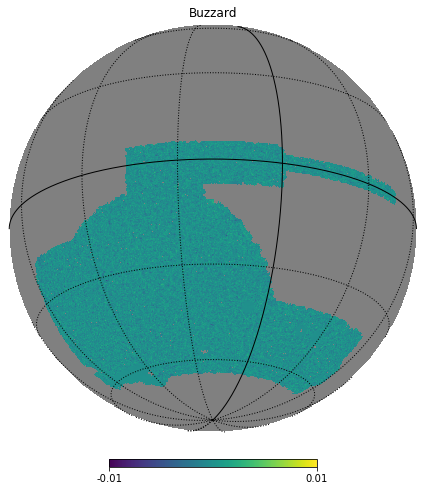

In [24]:
_ = plt.figure(figsize=(12,7))
_ = hp.orthview(np.where(mask>0,old_kappa - kappa, hp.UNSEEN),
            min=-0.01,max=0.01, rot=(20,-20,0) , half_sky=True, sub=(1,2,1),
               title='Buzzard'), hp.graticule()

# _ = hp.orthview(np.where(mask>0,kappa_buzzard_smoothed - old_kappa, hp.UNSEEN),
#             min=-0.01,max=0.01, rot=(20,-20,0) , half_sky=True, sub=(1,2,2),
#                title='Wiener'), hp.graticule()